#### Code to plot Figure 1a and 1b in Mahdavi & Siegel (2020); AS&T

This figure illustrates the amount of recovery (1A) and recovery efficiency (1B) from the tested filters after 1 or 2 extraction cycles.
Plot type(s): Combination of scatter and line plots.

Plot type: Combined scatter and line plots

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_excel(r'artl_dataset_summary_w_cv.xlsx')
df = df[df['Cycle_N'] <= 2]

### Defining counter which helps putting experimental cases into categories used for x axis of the plot

df['Counter'] = 0
df.sort_values(['td', 'ft', 'Cycle_N'], inplace =True)

counter = 1
for t in df['td'].unique():
    for f in df[df['td'] == t]['ft'].unique():
        for c in df[(df['td'] == t) & (df['ft'] == f)]['Cycle_N'].unique():
            df.loc[(df['td'] == t) & (df['ft'] == f) & (df['Cycle_N'] == c) , 'Counter'] = counter
            counter += 1
        counter += 1
    counter += 1

df.sort_values('Counter', inplace = True)


In [3]:
df.head()

,ExpN,Cycle_N,ft,td,M_filter_post,M_filter_change,M_filter_change_cum,M_d,M_d_cum,M_s,...,lat,cv_M_t_cum_1_1,cv_tCE_cum_1_1,cv_M_t_cum_1_2,cv_tCE_cum_1_2,cv_M_t_cum_2_1,cv_tCE_cum_2_1,cv_M_t_cum_2_2,cv_tCE_cum_2_2,Counter
33,20,1,1,1,272.493,0.208,0.208,0.08713,0.08713,0.00000,...,2,59.75,47.27,NaN,NaN,NaN,NaN,NaN,NaN,1
34,20,2,1,1,272.003,0.490,0.698,0.16680,0.25393,0.00000,...,2,NaN,NaN,45.58,41.93,NaN,NaN,NaN,NaN,2
19,11,1,2,1,261.381,0.210,0.210,0.11323,0.11323,0.00000,...,2,59.75,47.27,NaN,NaN,NaN,NaN,NaN,NaN,4
27,16,1,2,1,258.525,0.584,0.584,0.38847,0.38847,0.00000,...,2,59.75,47.27,NaN,NaN,NaN,NaN,NaN,NaN,4
3,3,1,3,1,286.370,1.306,1.306,0.52961,0.52961,0.00043,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


Mass Recovery Figure - Figure 1A
Steps: 
1) Filling NaN cv variables with similar cases
2) Defining error bar magnitudes
3) Categorizing the central data using df.loc command
4) Categorizing the error data using df.loc command
5) Categorizing line data that connects the recoveries coming from the same experiment
6) Plotting the figure

Steps 3-5 could have been performed iteratively (by defining local variables). However, I intentionally decided to hard-code to manually track all the data points to be inserted in the figure.


In [4]:
### Step 1: Filling NaN cv variables with similar cases

df['cv_M_t_cum_1_1'].dropna().unique()
df['cv_M_t_cum_1_1'].fillna(float(df['cv_M_t_cum_1_1'].dropna().unique()), inplace = True)

df['cv_M_t_cum_1_2'].dropna().unique()
df['cv_M_t_cum_1_2'].fillna(float(df['cv_M_t_cum_1_2'].dropna().unique()), inplace = True)

df['cv_M_t_cum_2_1'].dropna().unique()
df['cv_M_t_cum_2_1'].fillna(float(df['cv_M_t_cum_2_1'].dropna().unique()), inplace = True)

df['cv_M_t_cum_2_2'].dropna().unique()
df['cv_M_t_cum_2_2'].fillna(float(df['cv_M_t_cum_2_2'].dropna().unique()), inplace = True)


In [5]:
### Step 2: Calculating error bars

df['Error_mass_1_1'] = (df['cv_M_t_cum_1_1'] * df['M_t_cum']) / 100
df['Error_mass_1_2'] = (df['cv_M_t_cum_1_2'] * df['M_t_cum']) / 100

df['Error_mass_2_1'] = (df['cv_M_t_cum_2_1'] * df['M_t_cum']) / 100
df['Error_mass_2_2'] = (df['cv_M_t_cum_2_2'] * df['M_t_cum']) / 100

In [6]:
### Step 3: Categorizing the central data using df.loc command

## for x axis (experimental case)
x_1_1_1 = df.loc[(df['td'] == 1) & (df['ft'] == 1) & (df['Cycle_N'] == 1), 'Counter']
x_1_1_2 = df.loc[(df['td'] == 1) & (df['ft'] == 1) & (df['Cycle_N'] == 2), 'Counter']

x_1_2_1 = df.loc[(df['td'] == 1) & (df['ft'] == 2) & (df['Cycle_N'] == 1), 'Counter']
x_1_2_2 = df.loc[(df['td'] == 1) & (df['ft'] == 2) & (df['Cycle_N'] == 2), 'Counter']

x_1_3_1 = df.loc[(df['td'] == 1) & (df['ft'] == 3) & (df['Cycle_N'] == 1) & (df['dustmass'] < 10), 'Counter']
x_1_3_2 = df.loc[(df['td'] == 1) & (df['ft'] == 3) & (df['Cycle_N'] == 2) & (df['dustmass'] < 10), 'Counter']

x_1_3_1_high = df.loc[(df['td'] == 1) & (df['ft'] == 3) & (df['Cycle_N'] == 1) & (df['dustmass'] > 10), 'Counter']
x_1_3_2_high = df.loc[(df['td'] == 1) & (df['ft'] == 3) & (df['Cycle_N'] == 2) & (df['dustmass'] > 10), 'Counter']


x_1_4_1 = df.loc[(df['td'] == 1) & (df['ft'] == 4) & (df['Cycle_N'] == 1), 'Counter']
x_1_4_2 = df.loc[(df['td'] == 1) & (df['ft'] == 4) & (df['Cycle_N'] == 2), 'Counter']


x_2_1_1 = df.loc[(df['td'] == 2) & (df['ft'] == 1) & (df['Cycle_N'] == 1), 'Counter']
x_2_1_2 = df.loc[(df['td'] == 2) & (df['ft'] == 1) & (df['Cycle_N'] == 2), 'Counter']

x_2_2_1 = df.loc[(df['td'] == 2) & (df['ft'] == 2) & (df['Cycle_N'] == 1), 'Counter']
x_2_2_2 = df.loc[(df['td'] == 2) & (df['ft'] == 2) & (df['Cycle_N'] == 2), 'Counter']

x_2_3_1 = df.loc[(df['td'] == 2) & (df['ft'] == 3) & (df['Cycle_N'] == 1) & (df['dustmass'] < 10), 'Counter']
x_2_3_2 = df.loc[(df['td'] == 2) & (df['ft'] == 3) & (df['Cycle_N'] == 2) & (df['dustmass'] < 10), 'Counter']

x_2_3_1_high = df.loc[(df['td'] == 2) & (df['ft'] == 3) & (df['Cycle_N'] == 1) & (df['dustmass'] > 10), 'Counter']
x_2_3_2_high = df.loc[(df['td'] == 2) & (df['ft'] == 3) & (df['Cycle_N'] == 2) & (df['dustmass'] > 10), 'Counter']


x_2_4_1 = df.loc[(df['td'] == 2) & (df['ft'] == 4) & (df['Cycle_N'] == 1), 'Counter']
x_2_4_2 = df.loc[(df['td'] == 2) & (df['ft'] == 4) & (df['Cycle_N'] == 2), 'Counter']


## for y axis (the recovery amount)
y_1_1_1 = df.loc[(df['td'] == 1) & (df['ft'] == 1) & (df['Cycle_N'] == 1), 'M_t_cum']
y_1_1_2 = df.loc[(df['td'] == 1) & (df['ft'] == 1) & (df['Cycle_N'] == 2), 'M_t_cum']

y_1_2_1 = df.loc[(df['td'] == 1) & (df['ft'] == 2) & (df['Cycle_N'] == 1), 'M_t_cum']
y_1_2_2 = df.loc[(df['td'] == 1) & (df['ft'] == 2) & (df['Cycle_N'] == 2), 'M_t_cum']

y_1_3_1 = df.loc[(df['td'] == 1) & (df['ft'] == 3) & (df['Cycle_N'] == 1) & (df['dustmass'] < 10), 'M_t_cum']
y_1_3_2 = df.loc[(df['td'] == 1) & (df['ft'] == 3) & (df['Cycle_N'] == 2) & (df['dustmass'] < 10), 'M_t_cum']

y_1_3_1_high = df.loc[(df['td'] == 1) & (df['ft'] == 3) & (df['Cycle_N'] == 1) & (df['dustmass'] > 10), 'M_t_cum']
y_1_3_2_high = df.loc[(df['td'] == 1) & (df['ft'] == 3) & (df['Cycle_N'] == 2) & (df['dustmass'] > 10), 'M_t_cum']

y_1_4_1 = df.loc[(df['td'] == 1) & (df['ft'] == 4) & (df['Cycle_N'] == 1), 'M_t_cum']
y_1_4_2 = df.loc[(df['td'] == 1) & (df['ft'] == 4) & (df['Cycle_N'] == 2), 'M_t_cum']


y_2_1_1 = df.loc[(df['td'] == 2) & (df['ft'] == 1) & (df['Cycle_N'] == 1), 'M_t_cum']
y_2_1_2 = df.loc[(df['td'] == 2) & (df['ft'] == 1) & (df['Cycle_N'] == 2), 'M_t_cum']

y_2_2_1 = df.loc[(df['td'] == 2) & (df['ft'] == 2) & (df['Cycle_N'] == 1), 'M_t_cum']
y_2_2_2 = df.loc[(df['td'] == 2) & (df['ft'] == 2) & (df['Cycle_N'] == 2), 'M_t_cum']

y_2_3_1 = df.loc[(df['td'] == 2) & (df['ft'] == 3) & (df['Cycle_N'] == 1) & (df['dustmass'] < 10), 'M_t_cum']
y_2_3_2 = df.loc[(df['td'] == 2) & (df['ft'] == 3) & (df['Cycle_N'] == 2) & (df['dustmass'] < 10), 'M_t_cum']

y_2_3_1_high = df.loc[(df['td'] == 2) & (df['ft'] == 3) & (df['Cycle_N'] == 1) & (df['dustmass'] > 10), 'M_t_cum']
y_2_3_2_high = df.loc[(df['td'] == 2) & (df['ft'] == 3) & (df['Cycle_N'] == 2) & (df['dustmass'] > 10), 'M_t_cum']

y_2_4_1 = df.loc[(df['td'] == 2) & (df['ft'] == 4) & (df['Cycle_N'] == 1), 'M_t_cum']
y_2_4_2 = df.loc[(df['td'] == 2) & (df['ft'] == 4) & (df['Cycle_N'] == 2), 'M_t_cum']


In [7]:
### Step 4: Categorizing the error data using df.loc command

yerr_1_1_1 = df.loc[(df['td'] == 1) & (df['ft'] == 1) & (df['Cycle_N'] == 1), 'Error_mass_1_1']
yerr_1_1_2 = df.loc[(df['td'] == 1) & (df['ft'] == 1) & (df['Cycle_N'] == 2), 'Error_mass_1_2']

yerr_1_2_1 = df.loc[(df['td'] == 1) & (df['ft'] == 2) & (df['Cycle_N'] == 1), 'Error_mass_1_1']
yerr_1_2_2 = df.loc[(df['td'] == 1) & (df['ft'] == 2) & (df['Cycle_N'] == 2), 'Error_mass_1_2']

# yerr_1_3_1 = df.loc[(df['td'] == 1) & (df['ft'] == 3) & (df['Cycle_N'] == 1), 'Error_mass_1']
# yerr_1_3_2 = df.loc[(df['td'] == 1) & (df['ft'] == 3) & (df['Cycle_N'] == 2), 'Error_mass_2']

yerr_1_4_1 = df.loc[(df['td'] == 1) & (df['ft'] == 4) & (df['Cycle_N'] == 1), 'Error_mass_1_1']
yerr_1_4_2 = df.loc[(df['td'] == 1) & (df['ft'] == 4) & (df['Cycle_N'] == 2), 'Error_mass_1_2']

yerr_2_1_1 = df.loc[(df['td'] == 2) & (df['ft'] == 1) & (df['Cycle_N'] == 1), 'Error_mass_2_1']
yerr_2_1_2 = df.loc[(df['td'] == 2) & (df['ft'] == 1) & (df['Cycle_N'] == 2), 'Error_mass_2_2']

yerr_2_2_1 = df.loc[(df['td'] == 2) & (df['ft'] == 2) & (df['Cycle_N'] == 1), 'Error_mass_2_1']
yerr_2_2_2 = df.loc[(df['td'] == 2) & (df['ft'] == 2) & (df['Cycle_N'] == 2), 'Error_mass_2_2']

# yerr_2_3_1 = df.loc[(df['td'] == 2) & (df['ft'] == 3) & (df['Cycle_N'] == 1), 'Error_mass_1']
# yerr_2_3_2 = df.loc[(df['td'] == 2) & (df['ft'] == 3) & (df['Cycle_N'] == 2), 'Error_mass_2']

yerr_2_4_1 = df.loc[(df['td'] == 2) & (df['ft'] == 4) & (df['Cycle_N'] == 1), 'Error_mass_2_1']
yerr_2_4_2 = df.loc[(df['td'] == 2) & (df['ft'] == 4) & (df['Cycle_N'] == 2), 'Error_mass_2_2']


In [8]:
### Step 5: Categorizing line data that connects the mass recoveries coming from the same experiment
# those cases where the second extraction cycle was peformed are only included (hard-coded)

xline_20 = df.loc[(df['ExpN'] == 20), 'Counter']
yline_20 = df.loc[(df['ExpN'] == 20), 'M_t_cum']

xline_3 = df.loc[(df['ExpN'] == 3), 'Counter']
yline_3 = df.loc[(df['ExpN'] == 3), 'M_t_cum']

xline_10 = df.loc[(df['ExpN'] == 10), 'Counter']
yline_10 = df.loc[(df['ExpN'] == 10), 'M_t_cum']

xline_13 = df.loc[(df['ExpN'] == 13), 'Counter']
yline_13 = df.loc[(df['ExpN'] == 13), 'M_t_cum']

xline_14 = df.loc[(df['ExpN'] == 14), 'Counter']
yline_14 = df.loc[(df['ExpN'] == 14), 'M_t_cum']

xline_18 = df.loc[(df['ExpN'] == 18), 'Counter']
yline_18 = df.loc[(df['ExpN'] == 18), 'M_t_cum']


xline_2 = df.loc[(df['ExpN'] == 2), 'Counter']
yline_2 = df.loc[(df['ExpN'] == 2), 'M_t_cum']

xline_4 = df.loc[(df['ExpN'] == 4), 'Counter']
yline_4 = df.loc[(df['ExpN'] == 4), 'M_t_cum']

xline_5 = df.loc[(df['ExpN'] == 5), 'Counter']
yline_5 = df.loc[(df['ExpN'] == 5), 'M_t_cum']

xline_19 = df.loc[(df['ExpN'] == 19), 'Counter']
yline_19 = df.loc[(df['ExpN'] == 19), 'M_t_cum']

xline_21 = df.loc[(df['ExpN'] == 19), 'Counter']
yline_21 = df.loc[(df['ExpN'] == 19), 'M_t_cum']

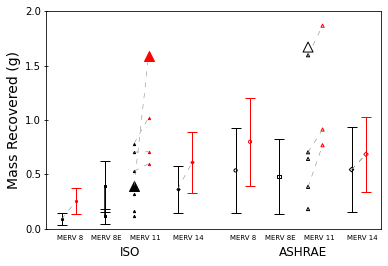

In [9]:
### Step 6: Plotting Figure 1A

plt.figure()

# All scatters: ISO-A2
plt.scatter(x_1_1_1, y_1_1_1, s = 5, c = 'black', marker = 'o')
plt.scatter(x_1_1_2, y_1_1_2, s = 5, c= 'red', marker = 'o')

plt.scatter(x_1_2_1, y_1_2_1, s = 5, c = 'black', marker = 's')
plt.scatter(x_1_2_2, y_1_2_2, s = 5, c= 'red', marker = 's')

plt.scatter(x_1_3_1, y_1_3_1, s = 5, c = 'black', marker = '^')
plt.scatter(x_1_3_2, y_1_3_2, s = 5, c= 'red', marker = '^')

plt.scatter(x_1_3_1_high, y_1_3_1_high, s = 100, c = 'black', marker = '^')
plt.scatter(x_1_3_2_high, y_1_3_2_high, s = 100, c= 'red', marker = '^')

plt.scatter(x_1_4_1, y_1_4_1, s = 5, c = 'black', marker = 'D')
plt.scatter(x_1_4_2, y_1_4_2, s = 5, c= 'red', marker = 'D')

plt.errorbar(x_1_1_1, y_1_1_1, yerr = yerr_1_1_1, xerr = None, elinewidth = 1, capsize = 5, c = 'black')
plt.errorbar(x_1_1_2, y_1_1_2, yerr = yerr_1_1_2, xerr = None, elinewidth = 1, capsize = 5, c = 'red')

plt.errorbar(x_1_2_1, y_1_2_1, yerr = yerr_1_2_1, xerr = None, elinewidth = 1, capsize = 5, c = 'black')
plt.errorbar(x_1_2_2, y_1_2_2, yerr = yerr_1_2_2, xerr = None, elinewidth = 1, capsize = 5, c = 'red')

plt.errorbar(x_1_4_1, y_1_4_1, yerr = yerr_1_4_1, xerr = None, elinewidth = 1, capsize = 5, c = 'black')
plt.errorbar(x_1_4_2, y_1_4_2, yerr = yerr_1_4_2, xerr = None, elinewidth = 1, capsize = 5, c = 'red')

# All lines: ISO-A2 (connecting 1st and 2nd cycle if any)
plt.plot(xline_20, yline_20, color='grey', linestyle = (0, (10, 12)), linewidth = 0.5)
plt.plot(xline_3, yline_3, color='grey', linestyle = (0, (10, 12)), linewidth = 0.5)
plt.plot(xline_10, yline_10, color='grey', linestyle = (0, (10, 12)), linewidth = 0.5)
plt.plot(xline_13, yline_13, color='grey', linestyle = (0, (10, 12)), linewidth = 0.5)
plt.plot(xline_14, yline_14, color='grey', linestyle = (0, (10, 12)), linewidth = 0.5)
plt.plot(xline_18, yline_18, color='grey', linestyle = (0, (10, 12)), linewidth = 0.5)


# All scatters: ASHRAE-#2
plt.scatter(x_2_1_1, y_2_1_1, s = 10, marker = 'o', facecolors = 'none', edgecolors='black', linewidth = 1)
plt.scatter(x_2_1_2, y_2_1_2, s = 10, marker = 'o', facecolors = 'none', edgecolors='red', linewidth = 1)

plt.scatter(x_2_2_1, y_2_2_1, s = 10, marker = 's', facecolors = 'none', edgecolors='black', linewidth = 1)
plt.scatter(x_2_2_2, y_2_2_2, s = 10, marker = 's', facecolors = 'none', edgecolors='red', linewidth = 1)

plt.scatter(x_2_3_1, y_2_3_1, s = 10, marker = '^', facecolors = 'none', edgecolors='black', linewidth = 1)
plt.scatter(x_2_3_2, y_2_3_2, s = 10, marker = '^', facecolors = 'none', edgecolors='red', linewidth = 1)

plt.scatter(x_2_3_1_high, y_2_3_1_high, s = 100, marker = '^', facecolors = 'none', edgecolors='black', linewidth = 1)
plt.scatter(x_2_3_2_high, y_2_3_2_high, s = 100, marker = '^', facecolors = 'none', edgecolors='red', linewidth = 1)

plt.scatter(x_2_4_1, y_2_4_1, s = 10, marker = 'D', facecolors = 'none', edgecolors='black', linewidth = 1)
plt.scatter(x_2_4_2, y_2_4_2, s = 10, marker = 'D', facecolors = 'none', edgecolors='red', linewidth = 1)

plt.errorbar(x_2_1_1, y_2_1_1, yerr = yerr_2_1_1, xerr = None, elinewidth = 1, capsize = 5, c = 'black')
plt.errorbar(x_2_1_2, y_2_1_2, yerr = yerr_2_1_2, xerr = None, elinewidth = 1, capsize = 5, c = 'red')

plt.errorbar(x_2_2_1, y_2_2_1, yerr = yerr_2_2_1, xerr = None, elinewidth = 1, capsize = 5, c = 'black')
plt.errorbar(x_2_2_2, y_2_2_2, yerr = yerr_2_2_2, xerr = None, elinewidth = 1, capsize = 5, c = 'red')

plt.errorbar(x_2_4_1, y_2_4_1, yerr = yerr_2_4_1, xerr = None, elinewidth = 1, capsize = 5, c = 'black')
plt.errorbar(x_2_4_2, y_2_4_2, yerr = yerr_2_4_2, xerr = None, elinewidth = 1, capsize = 5, c = 'red')

# All lines: ASHRAE#2 (connecting 1st and 2nd cycle if any)
plt.plot(xline_2, yline_2, color='grey', linestyle = (0, (10, 12)), linewidth = 0.5)
plt.plot(xline_4, yline_4, color='grey', linestyle = (0, (10, 12)), linewidth = 0.5)
plt.plot(xline_5, yline_5, color='grey', linestyle = (0, (10, 12)), linewidth = 0.5)
plt.plot(xline_19, yline_19, color='grey', linestyle = (0, (10, 12)), linewidth = 0.5)
plt.plot(xline_21, yline_21, color='grey', linestyle = (0, (10, 12)), linewidth = 0.5)

# Properties of the plot
plt.ylim(0, 2)
plt.yticks(np.arange(0, 2.5, step=0.5))
plt.ylabel('Mass Recovered (g)', size = 14)
plt.tick_params(axis = 'y', direction = 'inout')

plt.xticks([])
plt.text(5, -0.25, 'ISO', fontsize = 12)
plt.text(16, -0.25, 'ASHRAE', fontsize = 12)

plt.text(0.7, -0.1, 'MERV 8', fontsize = 7)
plt.text(3, -0.1, 'MERV 8E', fontsize = 7)
plt.text(5.7, -0.1, 'MERV 11', fontsize = 7)
plt.text(8.7, -0.1, 'MERV 14', fontsize = 7)

plt.text(12.6, -0.1, 'MERV 8', fontsize = 7)
plt.text(15, -0.1, 'MERV 8E', fontsize = 7)
plt.text(17.7, -0.1, 'MERV 11', fontsize = 7)
plt.text(20.7, -0.1, 'MERV 14', fontsize = 7)

# Saving and loading in data warehouse
plt.savefig(r'Figure1_Recovery.jpg', format='jpg', dpi=1600, bbox_inches='tight')


Recovery Efficiency Figure - Figure 1B
There are similar steps to those of the mass recovery figure

In [11]:
### Step 1: Filling NaN cv variables with similar cases (those correspond to recovery efficiency)

df['cv_tCE_cum_1_1'].dropna().unique()
df['cv_tCE_cum_1_1'].fillna(float(df['cv_tCE_cum_1_1'].dropna().unique()), inplace = True)

df['cv_tCE_cum_1_2'].dropna().unique()
df['cv_tCE_cum_1_2'].fillna(float(df['cv_tCE_cum_1_2'].dropna().unique()), inplace = True)

df['cv_tCE_cum_2_1'].dropna().unique()
df['cv_tCE_cum_2_1'].fillna(float(df['cv_tCE_cum_2_1'].dropna().unique()), inplace = True)

df['cv_tCE_cum_2_2'].dropna().unique()
df['cv_tCE_cum_2_2'].fillna(float(df['cv_tCE_cum_2_2'].dropna().unique()), inplace = True)


In [12]:
### Step 2: Calculating error bars

df['Error_eff_1_1'] = (df['cv_tCE_cum_1_1'] * df['tCE_cum']) / 100
df['Error_eff_1_2'] = (df['cv_tCE_cum_1_2'] * df['tCE_cum']) / 100

df['Error_eff_2_1'] = (df['cv_tCE_cum_2_1'] * df['tCE_cum']) / 100
df['Error_eff_2_2'] = (df['cv_tCE_cum_2_2'] * df['tCE_cum']) / 100


In [13]:
### Step 3: Categorizing the central data using df.loc command (for recovery efficiency)

# only for y-axis. x-axis data can be used from that of mass recovery figure
y_1_1_1 = df.loc[(df['td'] == 1) & (df['ft'] == 1) & (df['Cycle_N'] == 1), 'tCE_cum']
y_1_1_2 = df.loc[(df['td'] == 1) & (df['ft'] == 1) & (df['Cycle_N'] == 2), 'tCE_cum']

y_1_2_1 = df.loc[(df['td'] == 1) & (df['ft'] == 2) & (df['Cycle_N'] == 1), 'tCE_cum']
y_1_2_2 = df.loc[(df['td'] == 1) & (df['ft'] == 2) & (df['Cycle_N'] == 2), 'tCE_cum']

y_1_3_1 = df.loc[(df['td'] == 1) & (df['ft'] == 3) & (df['Cycle_N'] == 1) & (df['dustmass'] < 10), 'tCE_cum']
y_1_3_2 = df.loc[(df['td'] == 1) & (df['ft'] == 3) & (df['Cycle_N'] == 2) & (df['dustmass'] < 10), 'tCE_cum']

y_1_3_1_high = df.loc[(df['td'] == 1) & (df['ft'] == 3) & (df['Cycle_N'] == 1) & (df['dustmass'] > 10), 'tCE_cum']
y_1_3_2_high = df.loc[(df['td'] == 1) & (df['ft'] == 3) & (df['Cycle_N'] == 2) & (df['dustmass'] > 10), 'tCE_cum']

y_1_4_1 = df.loc[(df['td'] == 1) & (df['ft'] == 4) & (df['Cycle_N'] == 1), 'tCE_cum']
y_1_4_2 = df.loc[(df['td'] == 1) & (df['ft'] == 4) & (df['Cycle_N'] == 2), 'tCE_cum']


y_2_1_1 = df.loc[(df['td'] == 2) & (df['ft'] == 1) & (df['Cycle_N'] == 1), 'tCE_cum']
y_2_1_2 = df.loc[(df['td'] == 2) & (df['ft'] == 1) & (df['Cycle_N'] == 2), 'tCE_cum']

y_2_2_1 = df.loc[(df['td'] == 2) & (df['ft'] == 2) & (df['Cycle_N'] == 1), 'tCE_cum']
y_2_2_2 = df.loc[(df['td'] == 2) & (df['ft'] == 2) & (df['Cycle_N'] == 2), 'tCE_cum']

y_2_3_1 = df.loc[(df['td'] == 2) & (df['ft'] == 3) & (df['Cycle_N'] == 1) & (df['dustmass'] < 10), 'tCE_cum']
y_2_3_2 = df.loc[(df['td'] == 2) & (df['ft'] == 3) & (df['Cycle_N'] == 2) & (df['dustmass'] < 10), 'tCE_cum']

y_2_3_1_high = df.loc[(df['td'] == 2) & (df['ft'] == 3) & (df['Cycle_N'] == 1) & (df['dustmass'] > 10), 'tCE_cum']
y_2_3_2_high = df.loc[(df['td'] == 2) & (df['ft'] == 3) & (df['Cycle_N'] == 2) & (df['dustmass'] > 10), 'tCE_cum']

y_2_4_1 = df.loc[(df['td'] == 2) & (df['ft'] == 4) & (df['Cycle_N'] == 1), 'tCE_cum']
y_2_4_2 = df.loc[(df['td'] == 2) & (df['ft'] == 4) & (df['Cycle_N'] == 2), 'tCE_cum']

In [14]:
### Step 4: Categorizing the error data using df.loc command (for recovery efficiency)


yerr_1_1_1 = df.loc[(df['td'] == 1) & (df['ft'] == 1) & (df['Cycle_N'] == 1), 'Error_eff_1_1']
yerr_1_1_2 = df.loc[(df['td'] == 1) & (df['ft'] == 1) & (df['Cycle_N'] == 2), 'Error_eff_1_2']

yerr_1_2_1 = df.loc[(df['td'] == 1) & (df['ft'] == 2) & (df['Cycle_N'] == 1), 'Error_eff_1_1']
yerr_1_2_2 = df.loc[(df['td'] == 1) & (df['ft'] == 2) & (df['Cycle_N'] == 2), 'Error_eff_1_2']

# yerr_1_3_1 = df.loc[(df['td'] == 1) & (df['ft'] == 3) & (df['Cycle_N'] == 1), 'Error_mass_1']
# yerr_1_3_2 = df.loc[(df['td'] == 1) & (df['ft'] == 3) & (df['Cycle_N'] == 2), 'Error_mass_2']

yerr_1_4_1 = df.loc[(df['td'] == 1) & (df['ft'] == 4) & (df['Cycle_N'] == 1), 'Error_eff_1_1']
yerr_1_4_2 = df.loc[(df['td'] == 1) & (df['ft'] == 4) & (df['Cycle_N'] == 2), 'Error_eff_1_2']

yerr_2_1_1 = df.loc[(df['td'] == 2) & (df['ft'] == 1) & (df['Cycle_N'] == 1), 'Error_eff_2_1']
yerr_2_1_2 = df.loc[(df['td'] == 2) & (df['ft'] == 1) & (df['Cycle_N'] == 2), 'Error_eff_2_2']

yerr_2_2_1 = df.loc[(df['td'] == 2) & (df['ft'] == 2) & (df['Cycle_N'] == 1), 'Error_eff_2_1']
yerr_2_2_2 = df.loc[(df['td'] == 2) & (df['ft'] == 2) & (df['Cycle_N'] == 2), 'Error_eff_2_2']

# yerr_2_3_1 = df.loc[(df['td'] == 2) & (df['ft'] == 3) & (df['Cycle_N'] == 1), 'Error_mass_1']
# yerr_2_3_2 = df.loc[(df['td'] == 2) & (df['ft'] == 3) & (df['Cycle_N'] == 2), 'Error_mass_2']

yerr_2_4_1 = df.loc[(df['td'] == 2) & (df['ft'] == 4) & (df['Cycle_N'] == 1), 'Error_eff_2_1']
yerr_2_4_2 = df.loc[(df['td'] == 2) & (df['ft'] == 4) & (df['Cycle_N'] == 2), 'Error_eff_2_2']


In [15]:
### Step 5: Categorizing line data that connects the recovery efficiencies coming from the same experiment
# those cases where the second extraction cycle was peformed are only included (hard-coded)

yline_20 = df.loc[(df['ExpN'] == 20), 'tCE_cum']
yline_3 = df.loc[(df['ExpN'] == 3), 'tCE_cum']
yline_10 = df.loc[(df['ExpN'] == 10), 'tCE_cum']
yline_13 = df.loc[(df['ExpN'] == 13), 'tCE_cum']
yline_14 = df.loc[(df['ExpN'] == 14), 'tCE_cum']
yline_18 = df.loc[(df['ExpN'] == 18), 'tCE_cum']

yline_2 = df.loc[(df['ExpN'] == 2), 'tCE_cum']
yline_4 = df.loc[(df['ExpN'] == 4), 'tCE_cum']
yline_5 = df.loc[(df['ExpN'] == 5), 'tCE_cum']
yline_19 = df.loc[(df['ExpN'] == 19), 'tCE_cum']
yline_21 = df.loc[(df['ExpN'] == 19), 'tCE_cum']

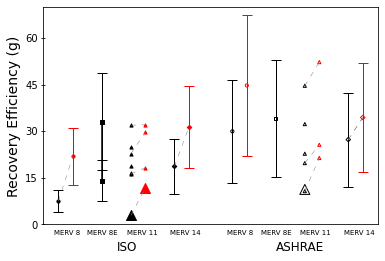

In [16]:
### Step 6: Plotting Figure 1B

plt.figure()

# All scatters: ISO-A2
plt.scatter(x_1_1_1, y_1_1_1, s = 10, c = 'black', marker = 'o')
plt.scatter(x_1_1_2, y_1_1_2, s = 10, c= 'red', marker = 'o')

plt.scatter(x_1_2_1, y_1_2_1, s = 10, c = 'black', marker = 's')
plt.scatter(x_1_2_2, y_1_2_2, s = 10, c= 'red', marker = 's')

plt.scatter(x_1_3_1, y_1_3_1, s = 10, c = 'black', marker = '^')
plt.scatter(x_1_3_2, y_1_3_2, s = 10, c= 'red', marker = '^')

plt.scatter(x_1_3_1_high, y_1_3_1_high, s = 100, c = 'black', marker = '^')
plt.scatter(x_1_3_2_high, y_1_3_2_high, s = 100, c= 'red', marker = '^')

plt.scatter(x_1_4_1, y_1_4_1, s = 10, c = 'black', marker = 'D')
plt.scatter(x_1_4_2, y_1_4_2, s = 10, c= 'red', marker = 'D')

plt.errorbar(x_1_1_1, y_1_1_1, yerr = yerr_1_1_1, xerr = None, elinewidth = 1, capsize = 5, c = 'black')
plt.errorbar(x_1_1_2, y_1_1_2, yerr = yerr_1_1_2, xerr = None, elinewidth = 1, capsize = 5, c = 'red')

plt.errorbar(x_1_2_1, y_1_2_1, yerr = yerr_1_2_1, xerr = None, elinewidth = 1, capsize = 5, c = 'black')
plt.errorbar(x_1_2_2, y_1_2_2, yerr = yerr_1_2_2, xerr = None, elinewidth = 1, capsize = 5, c = 'red')

plt.errorbar(x_1_4_1, y_1_4_1, yerr = yerr_1_4_1, xerr = None, elinewidth = 1, capsize = 5, c = 'black')
plt.errorbar(x_1_4_2, y_1_4_2, yerr = yerr_1_4_2, xerr = None, elinewidth = 1, capsize = 5, c = 'red')

# All lines: ISO-A2 (connecting 1st and 2nd cycle if any)
plt.plot(xline_20, yline_20, color='grey', linestyle = (0, (10, 12)), linewidth = 0.5)
plt.plot(xline_3, yline_3, color='grey', linestyle = (0, (10, 12)), linewidth = 0.5)
plt.plot(xline_10, yline_10, color='grey', linestyle = (0, (10, 12)), linewidth = 0.5)
plt.plot(xline_13, yline_13, color='grey', linestyle = (0, (10, 12)), linewidth = 0.5)
plt.plot(xline_14, yline_14, color='grey', linestyle = (0, (10, 12)), linewidth = 0.5)
plt.plot(xline_18, yline_18, color='grey', linestyle = (0, (10, 12)), linewidth = 0.5)


# All scatters: ASHRAE #2
plt.scatter(x_2_1_1, y_2_1_1, s = 10, marker = 'o', facecolors = 'none', edgecolors='black', linewidth = 1)
plt.scatter(x_2_1_2, y_2_1_2, s = 10, marker = 'o', facecolors = 'none', edgecolors='red', linewidth = 1)

plt.scatter(x_2_2_1, y_2_2_1, s = 10, marker = 's', facecolors = 'none', edgecolors='black', linewidth = 1)
plt.scatter(x_2_2_2, y_2_2_2, s = 10, marker = 's', facecolors = 'none', edgecolors='red', linewidth = 1)

plt.scatter(x_2_3_1, y_2_3_1, s = 10, marker = '^', facecolors = 'none', edgecolors='black', linewidth = 1)
plt.scatter(x_2_3_2, y_2_3_2, s = 10, marker = '^', facecolors = 'none', edgecolors='red', linewidth = 1)

plt.scatter(x_2_3_1_high, y_2_3_1_high, s = 100, marker = '^', facecolors = 'none', edgecolors='black', linewidth = 1)
plt.scatter(x_2_3_2_high, y_2_3_2_high, s = 100, marker = '^', facecolors = 'none', edgecolors='red', linewidth = 1)

plt.scatter(x_2_4_1, y_2_4_1, s = 10, marker = 'D', facecolors = 'none', edgecolors='black', linewidth = 1)
plt.scatter(x_2_4_2, y_2_4_2, s = 10, marker = 'D', facecolors = 'none', edgecolors='red', linewidth = 1)

plt.errorbar(x_2_1_1, y_2_1_1, yerr = yerr_2_1_1, xerr = None, elinewidth = 1, capsize = 5, c = 'black')
plt.errorbar(x_2_1_2, y_2_1_2, yerr = yerr_2_1_2, xerr = None, elinewidth = 1, capsize = 5, c = 'red')

plt.errorbar(x_2_2_1, y_2_2_1, yerr = yerr_2_2_1, xerr = None, elinewidth = 1, capsize = 5, c = 'black')
plt.errorbar(x_2_2_2, y_2_2_2, yerr = yerr_2_2_2, xerr = None, elinewidth = 1, capsize = 5, c = 'red')

plt.errorbar(x_2_4_1, y_2_4_1, yerr = yerr_2_4_1, xerr = None, elinewidth = 1, capsize = 5, c = 'black')
plt.errorbar(x_2_4_2, y_2_4_2, yerr = yerr_2_4_2, xerr = None, elinewidth = 1, capsize = 5, c = 'red')

# All lines: ASHRAE #2 (connecting 1st and 2nd cycle if any)
plt.plot(xline_2, yline_2, color='grey', linestyle = (0, (10, 12)), linewidth = 0.5)
plt.plot(xline_4, yline_4, color='grey', linestyle = (0, (10, 12)), linewidth = 0.5)
plt.plot(xline_5, yline_5, color='grey', linestyle = (0, (10, 12)), linewidth = 0.5)
plt.plot(xline_19, yline_19, color='grey', linestyle = (0, (10, 12)), linewidth = 0.5)
plt.plot(xline_21, yline_21, color='grey', linestyle = (0, (10, 12)), linewidth = 0.5)


# Properties of the plot
plt.ylim(0, 70)
plt.yticks(np.arange(0, 70, step=15))
plt.ylabel('Recovery Efficiency (g)', size = 14)
plt.tick_params(axis = 'y', direction = 'inout')

plt.xticks([])
plt.text(5, -8.5, 'ISO', fontsize = 12)
plt.text(16, -8.5, 'ASHRAE', fontsize = 12)

plt.text(0.7, -3.3, 'MERV 8', fontsize = 7)
plt.text(3, -3.3, 'MERV 8E', fontsize = 7)
plt.text(5.7, -3.3, 'MERV 11', fontsize = 7)
plt.text(8.7, -3.3, 'MERV 14', fontsize = 7)

plt.text(12.6, -3.3, 'MERV 8', fontsize = 7)
plt.text(15, -3.3, 'MERV 8E', fontsize = 7)
plt.text(17.7, -3.3, 'MERV 11', fontsize = 7)
plt.text(20.7, -3.3, 'MERV 14', fontsize = 7)


plt.savefig(r'Figure1_Efficiency.jpg', format='jpg', dpi=1600, bbox_inches='tight')


End of Code